<a href="https://colab.research.google.com/github/Fresias/aws-s3-static-website-sample/blob/master/Aprender2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dash plotly


In [1]:
pip install dash

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Cargar los datos
df = pd.read_csv('/content/drive/MyDrive/CCD/Aprender 2022/csv/estudiantes2022.csv', sep=';')

# Lista de las columnas que deseas filtrar
variables_filtradas = [
    'jurisdiccion', 'ID1', 'seccion', 'idalumno', 'ap01', 'ap03', 'ap14', 'ap22',
    'ap23', 'ap24', 'ap25a', 'ap25b', 'ap25c', 'ap25d', 'ap25e', 'ap25f', 'ap25g',
    'ap25h', 'ap25i', 'ap25j', 'ap28a', 'ap28b', 'ap28c', 'ap28d', 'ap29', 'ap30',
    'sector', 'ambito', 'ponder', 'lpondera', 'mpondera', 'ldesemp', 'mdesemp',
    'lpuntaje', 'mpuntaje', 'NSE_puntaje', 'NSE_nivel', 'edadA_junio2022', 'sobreedad',
    'migracion', 'Nivel_Ed_Madre', 'Nivel_Ed_Padre', 'Nivel_Ed_Persona_Resp'
]

# Filtrar el DataFrame por las columnas seleccionadas
df_filtrado = df[variables_filtradas]

# Vista inicial de los datos filtrados
print(df_filtrado.head())


<ipython-input-3-565250d29a78>:2: DtypeWarning: Columns (6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,111,112,113) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/CCD/Aprender 2022/csv/estudiantes2022.csv', sep=';')


   jurisdiccion              ID1  seccion  idalumno ap01 ap03 ap14 ap22 ap23  \
0             2  396970010637139        2        22                            
1             2  396970010637139        2        18                            
2             2  396970010637139        1        18                            
3             2  971700824929717        2        10                            
4             2  971700824929717        1        23                            

  ap24  ...   lpuntaje   mpuntaje NSE_puntaje NSE_nivel edadA_junio2022  \
0       ...  497,61646  395,31659                                         
1       ...  440,10049  414,74878                                         
2       ...  608,22382  549,40967                                         
3       ...  582,31982  526,39301                                         
4       ...  381,68524  418,19516                                         

  sobreedad migracion Nivel_Ed_Madre Nivel_Ed_Padre Nivel_Ed_Persona

In [4]:
# Reemplazar los valores codificados como faltantes con NaN
df_filtrado.replace([-8], pd.NA, inplace=True)

# Revisión de valores nulos por columna nuevamente
nulos = df_filtrado.isnull().sum()
print(nulos[nulos > 0])  # Mostrar solo columnas con nulos

<ipython-input-4-e451131d380d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado.replace([-8], pd.NA, inplace=True)


ap03       2
ap14      33
ap22      38
ap23     107
ap24     109
ap25a      1
ap25b      1
ap25c      1
ap25d      1
ap25e      1
ap25f      1
ap25g      1
ap25h      1
ap25i      1
ap25j      1
ap28a    111
ap28b    111
ap28c    111
ap28d    111
ap29     112
ap30      40
dtype: int64


In [7]:
# Diccionarios de mapeo basados en el PDF proporcionado
mapeo_jurisdiccion = {
    2: 'Ciudad Autónoma de Buenos Aires', 6: 'Buenos Aires', 10: 'Catamarca', 14: 'Córdoba',
    18: 'Corrientes', 22: 'Chaco', 26: 'Chubut', 30: 'Entre Ríos', 34: 'Formosa', 38: 'Jujuy',
    42: 'La Pampa', 46: 'La Rioja', 50: 'Mendoza', 54: 'Misiones', 58: 'Neuquén', 62: 'Río Negro',
    66: 'Salta', 70: 'San Juan', 74: 'San Luis', 78: 'Santa Cruz', 82: 'Santa Fe', 86: 'Santiago del Estero',
    90: 'Tucumán', 94: 'Tierra del Fuego, Antártida e Islas del Atlántico Sur'
}

mapeo_ap01 = {
    -9: 'Blanco', -8: 'No disponible', 1: '10 años o menos', 2: '11 años',
    3: '12 años', 4: '13 años', 5: '14 años o más'
}

mapeo_ap03 = {
    -9: 'Blanco', -8: 'No disponible', 1: 'Masculino', 2: 'Femenino', 3: 'X'
}

mapeo_ap14 = {
    -9: 'Blanco', -8: 'No disponible', 1: 'Sí', 2: 'No'
}

mapeo_ap22 = {
    -9: 'Blanco', -8: 'No disponible', 1: 'Sí, fui al jardín antes de los 4 años',
    2: 'Sí, fui al jardín desde sala de 4', 3: 'Sí, fui al jardín desde sala de 5', 4: 'No, no fui al jardín'
}

mapeo_ap23 = {
    -9: 'Blanco', -8: 'No disponible', 1: 'No', 2: 'Sí, una vez', 3: 'Sí, dos veces', 4: 'Sí, tres veces o más'
}

mapeo_ap24 = {
    -9: 'Blanco', -8: 'No disponible', 1: 'Ninguna vez', 2: 'Entre 1 y 5 veces',
    3: 'Entre 6 y 9 veces', 4: 'Entre 10 y 15 veces', 5: 'Entre 16 y 20 veces', 6: 'Más de 20 veces'
}

mapeo_ap25 = {
    -9: 'Blanco', -8: 'No disponible', 0: 'No selecciona', 1: 'Selecciona'
}

mapeo_ap28 = {
    -9: 'Blanco', -8: 'No disponible', 1: 'Muy bien', 2: 'Bien', 3: 'Más o menos bien', 4: 'No muy bien'
}

mapeo_ap29 = {
    -9: 'Blanco', -8: 'No disponible', 1: 'Sí', 2: 'No'
}

mapeo_ap30 = {
    -9: 'Blanco', -8: 'No disponible', 1: 'Sí, con todas y todos', 2: 'Sí, con la mayoría',
    3: 'Sí, con algunas y algunos', 4: 'Sí, con pocas y pocos', 5: 'No me llevo bien con ninguna o ningún compañero'
}

mapeo_sector = {1: 'Estatal', 2: 'Privado'}
mapeo_ambito = {1: 'Rural', 2: 'Urbano'}

mapeo_NSE_nivel = {
    1: 'Bajo', 2: 'Medio', 3: 'Alto'
}

mapeo_edadA_junio2022 = {
    -9: 'Blanco', 1: '10 años o menos', 2: '11 años', 3: '12 años',
    4: '13 años', 5: '14 años o más'
}

mapeo_sobreedad = {
    -9: 'Blanco', 0: 'Menor de 11 años', 1: 'Edad teórica para el año (11 años al 30 de junio)',
    2: '1 año de sobreedad (12 años al 30 de junio)', 3: '2 años de sobreedad (13 años al 30 de junio)',
    4: '3 años o más de sobreedad (14 años o más al 30 de junio)'
}

mapeo_migracion = {
    -9: 'Blanco', 1: 'Configuración familiar migrante', 2: 'Configuración familiar no migrante'
}

mapeo_nivel_ed = {
    1: 'No fue a la escuela', 2: 'Primaria incompleta', 3: 'Primaria completa',
    4: 'Secundaria incompleta', 5: 'Secundaria completa',
    6: 'Terciario/universitario/posgrado incompleto', 7: 'Terciario/universitario/posgrado completo'
}

# Aplicar los mapeos a las columnas correspondientes
df_filtrado['jurisdiccion'] = df_filtrado['jurisdiccion'].replace(mapeo_jurisdiccion)
df_filtrado['ap01'] = df_filtrado['ap01'].replace(mapeo_ap01)
df_filtrado['ap03'] = df_filtrado['ap03'].replace(mapeo_ap03)
df_filtrado['ap14'] = df_filtrado['ap14'].replace(mapeo_ap14)
df_filtrado['ap22'] = df_filtrado['ap22'].replace(mapeo_ap22)
df_filtrado['ap23'] = df_filtrado['ap23'].replace(mapeo_ap23)
df_filtrado['ap24'] = df_filtrado['ap24'].replace(mapeo_ap24)
df_filtrado['ap25a'] = df_filtrado['ap25a'].replace(mapeo_ap25)
df_filtrado['ap25b'] = df_filtrado['ap25b'].replace(mapeo_ap25)
df_filtrado['ap25c'] = df_filtrado['ap25c'].replace(mapeo_ap25)
df_filtrado['ap25d'] = df_filtrado['ap25d'].replace(mapeo_ap25)
df_filtrado['ap25e'] = df_filtrado['ap25e'].replace(mapeo_ap25)
df_filtrado['ap25f'] = df_filtrado['ap25f'].replace(mapeo_ap25)
df_filtrado['ap25g'] = df_filtrado['ap25g'].replace(mapeo_ap25)
df_filtrado['ap25h'] = df_filtrado['ap25h'].replace(mapeo_ap25)
df_filtrado['ap25i'] = df_filtrado['ap25i'].replace(mapeo_ap25)
df_filtrado['ap25j'] = df_filtrado['ap25j'].replace(mapeo_ap25)
df_filtrado['ap28a'] = df_filtrado['ap28a'].replace(mapeo_ap28)
df_filtrado['ap28b'] = df_filtrado['ap28b'].replace(mapeo_ap28)
df_filtrado['ap28c'] = df_filtrado['ap28c'].replace(mapeo_ap28)
df_filtrado['ap28d'] = df_filtrado['ap28d'].replace(mapeo_ap28)
df_filtrado['ap29'] = df_filtrado['ap29'].replace(mapeo_ap29)
df_filtrado['ap30'] = df_filtrado['ap30'].replace(mapeo_ap30)
df_filtrado['sector'] = df_filtrado['sector'].replace(mapeo_sector)
df_filtrado['ambito'] = df_filtrado['ambito'].replace(mapeo_ambito)
df_filtrado['NSE_nivel'] = df_filtrado['NSE_nivel'].replace(mapeo_NSE_nivel)
df_filtrado['edadA_junio2022'] = df_filtrado['edadA_junio2022'].replace(mapeo_edadA_junio2022)
df_filtrado['sobreedad'] = df_filtrado['sobreedad'].replace(mapeo_sobreedad)
df_filtrado['migracion'] = df_filtrado['migracion'].replace(mapeo_migracion)
df_filtrado['Nivel_Ed_Madre'] = df_filtrado['Nivel_Ed_Madre'].replace(mapeo_nivel_ed)
df_filtrado['Nivel_Ed_Padre'] = df_filtrado['Nivel_Ed_Padre'].replace(mapeo_nivel_ed)
df_filtrado['Nivel_Ed_Persona_Resp'] = df_filtrado['Nivel_Ed_Persona_Resp'].replace(mapeo_nivel_ed)

# Verificación de los primeros resultados después de aplicar los mapeos
df_filtrado.head()


<ipython-input-7-3728ee76af06>:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['jurisdiccion'] = df_filtrado['jurisdiccion'].replace(mapeo_jurisdiccion)
<ipython-input-7-3728ee76af06>:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['ap01'] = df_filtrado['ap01'].replace(mapeo_ap01)
<ipython-input-7-3728ee76af06>:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,jurisdiccion,ID1,seccion,idalumno,ap01,ap03,ap14,ap22,ap23,ap24,...,lpuntaje,mpuntaje,NSE_puntaje,NSE_nivel,edadA_junio2022,sobreedad,migracion,Nivel_Ed_Madre,Nivel_Ed_Padre,Nivel_Ed_Persona_Resp
0,Ciudad Autónoma de Buenos Aires,396970010637139,2,22,,,,,,,...,"497,61646","395,31659",,,,,,,,
1,Ciudad Autónoma de Buenos Aires,396970010637139,2,18,,,,,,,...,"440,10049","414,74878",,,,,,,,
2,Ciudad Autónoma de Buenos Aires,396970010637139,1,18,,,,,,,...,"608,22382","549,40967",,,,,,,,
3,Ciudad Autónoma de Buenos Aires,971700824929717,2,10,,,,,,,...,"582,31982","526,39301",,,,,,,,
4,Ciudad Autónoma de Buenos Aires,971700824929717,1,23,,,,,,,...,"381,68524","418,19516",,,,,,,,


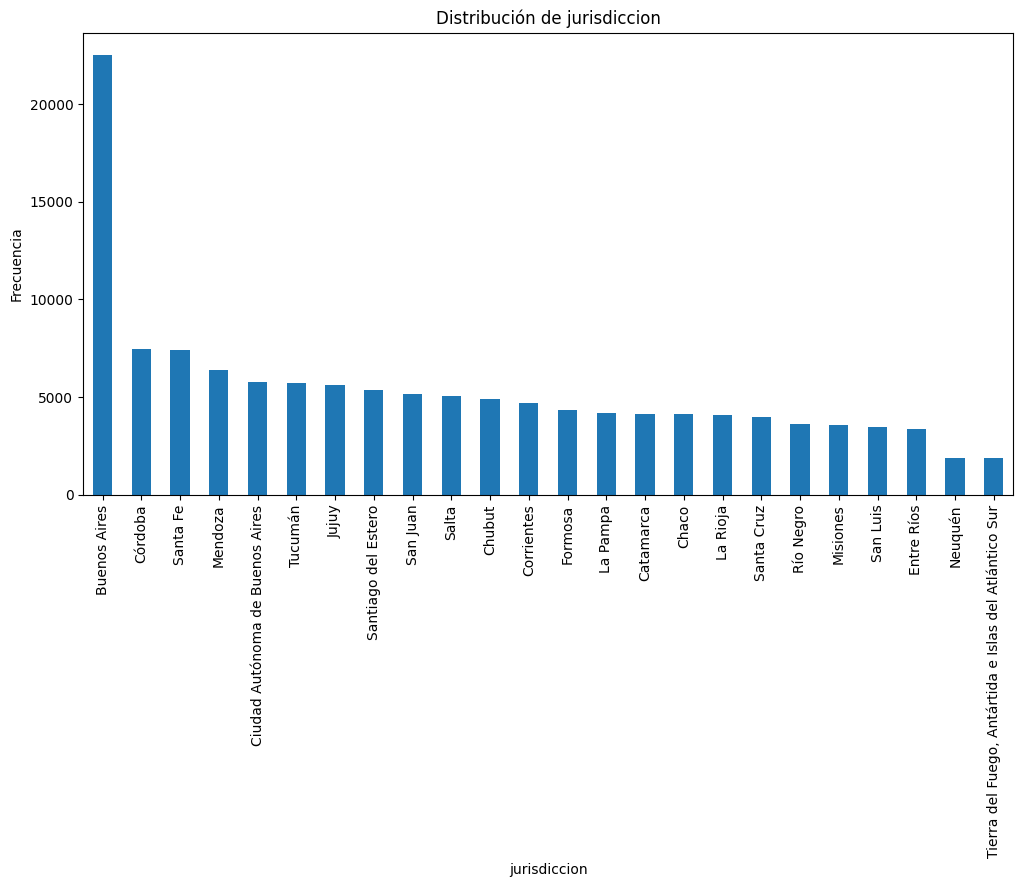

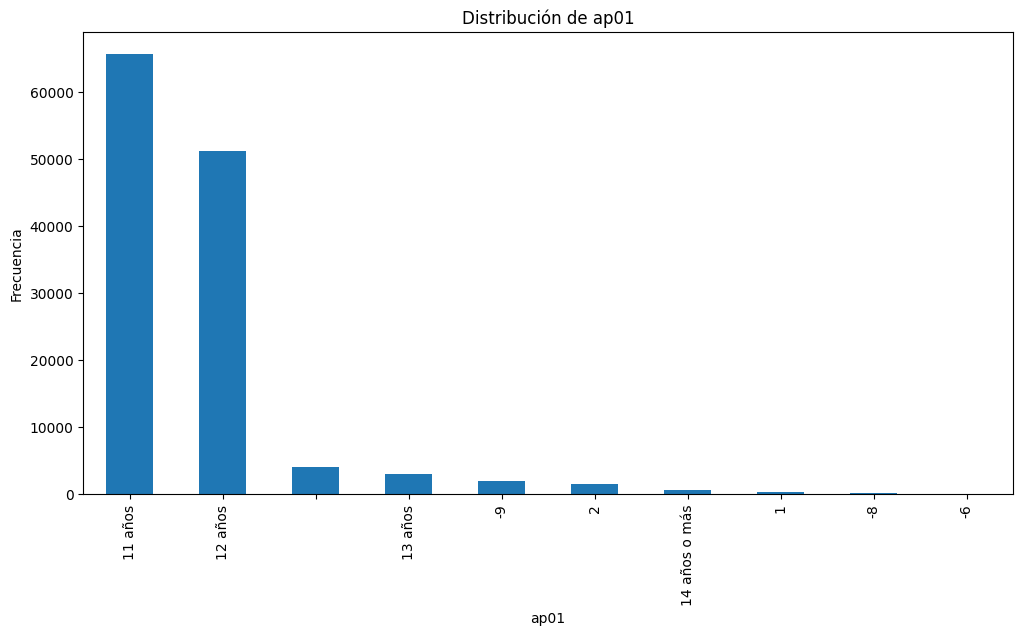

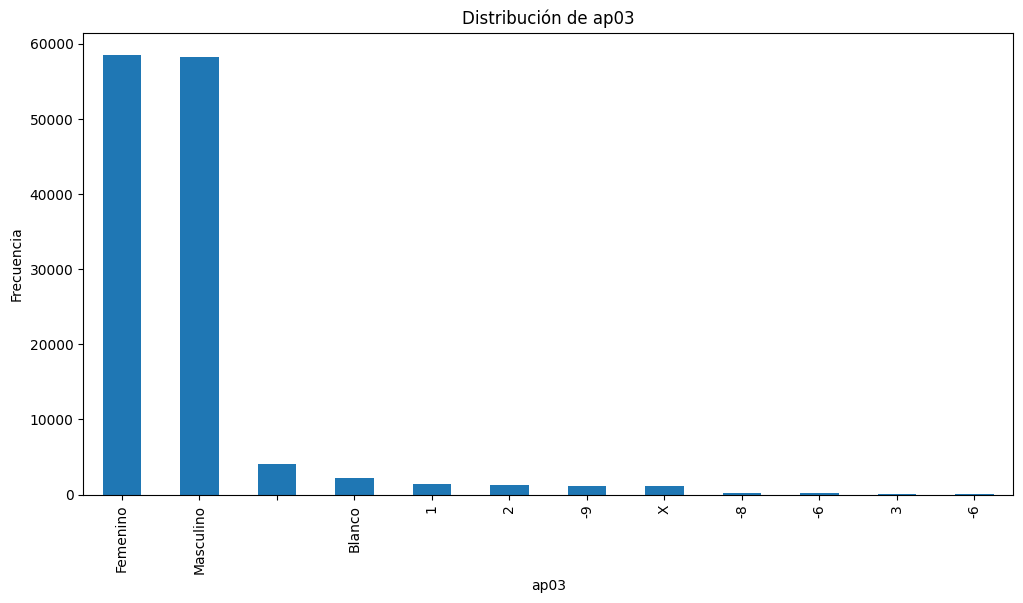

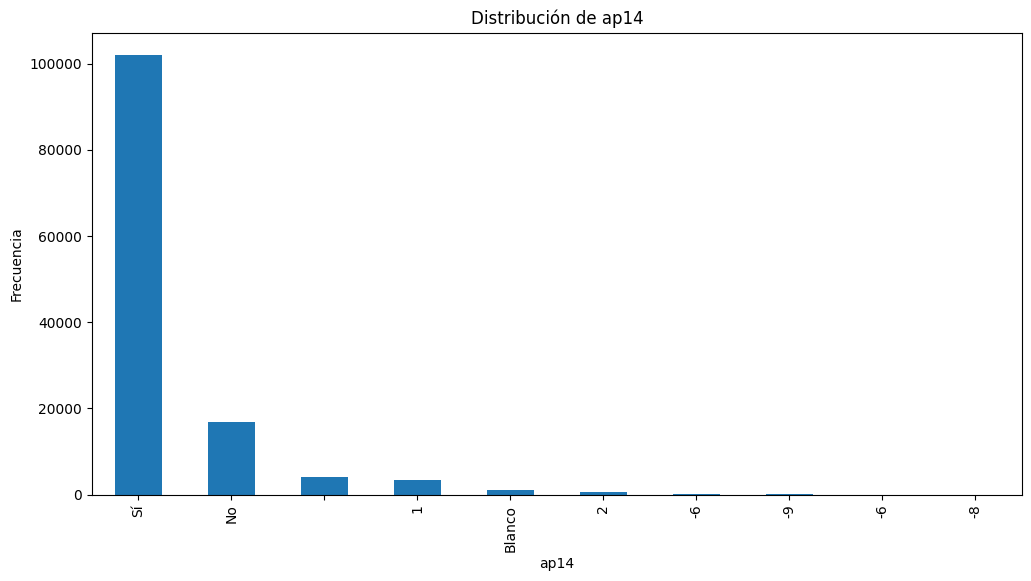

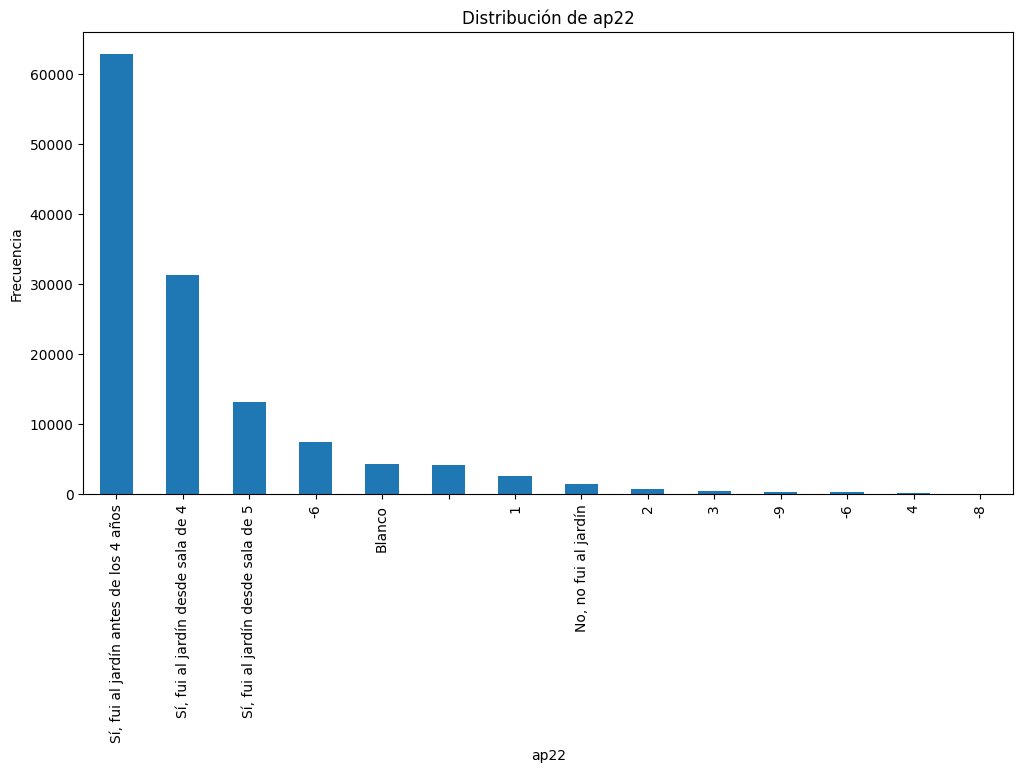

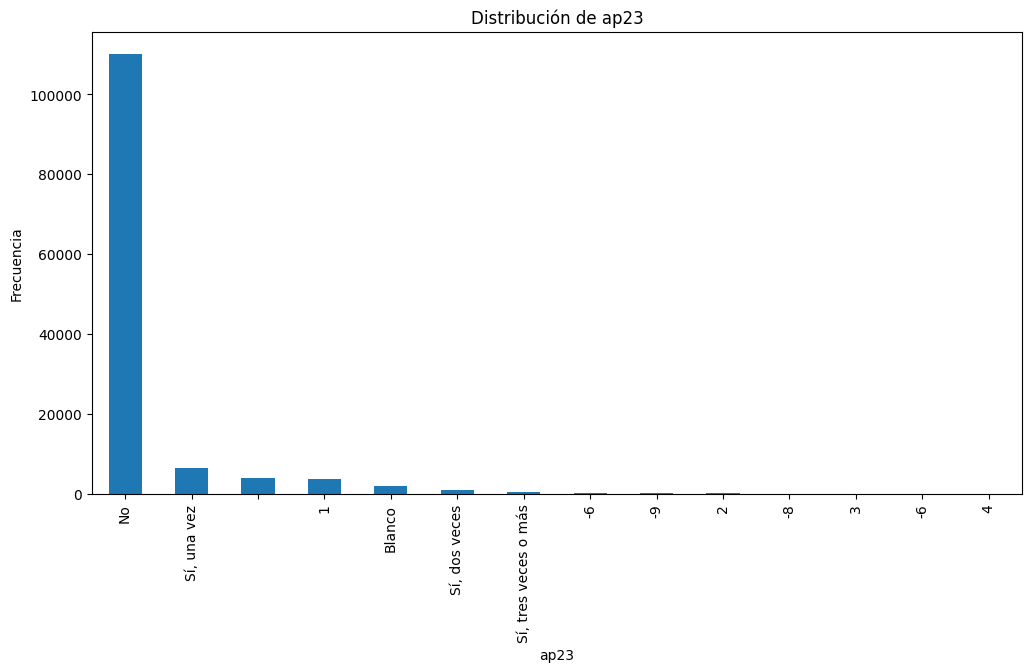

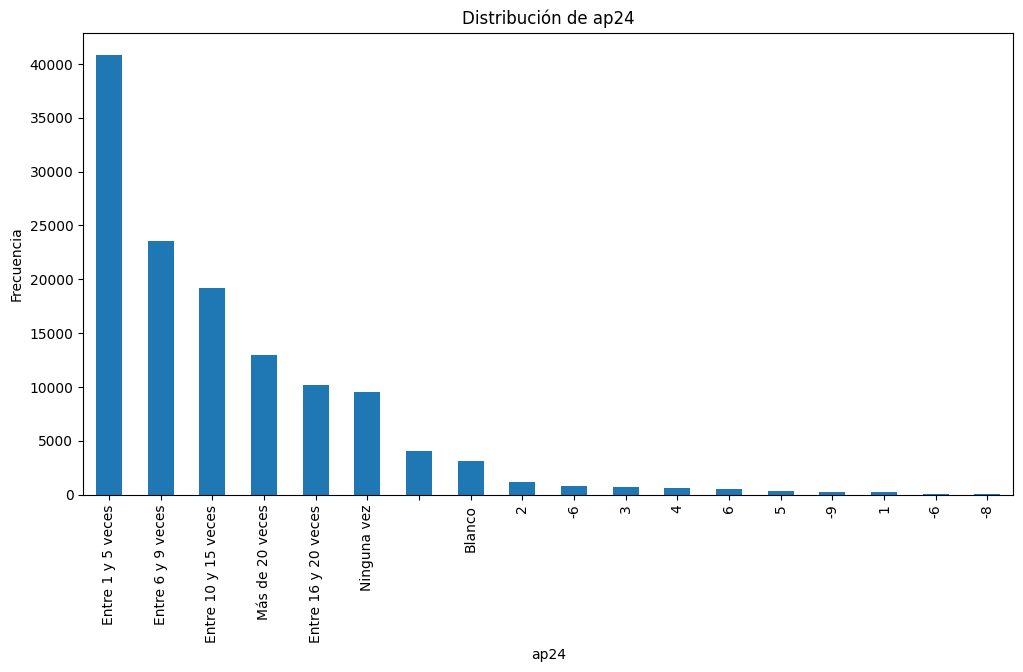

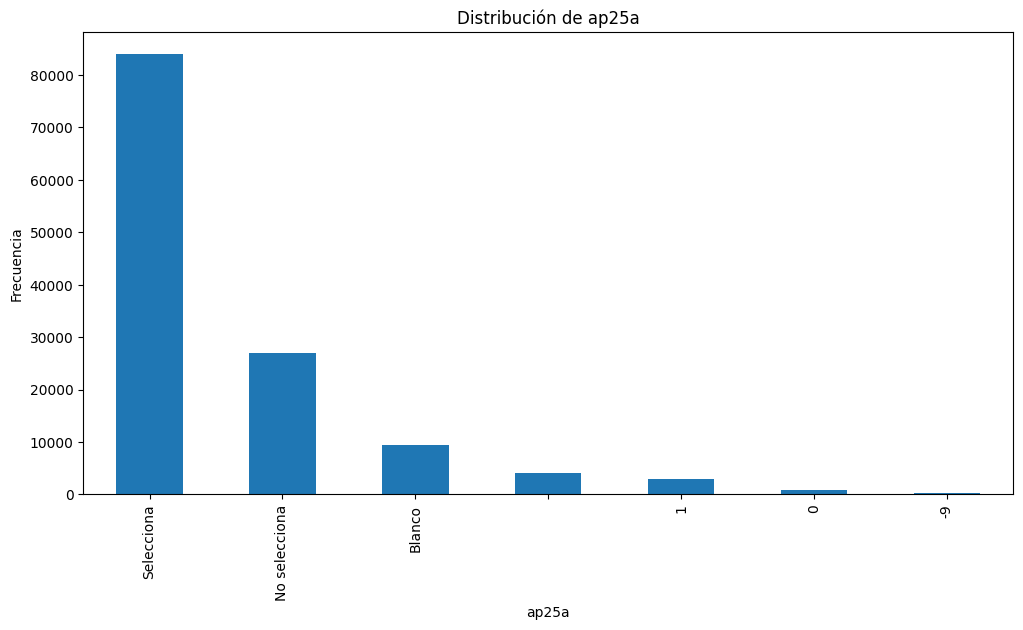

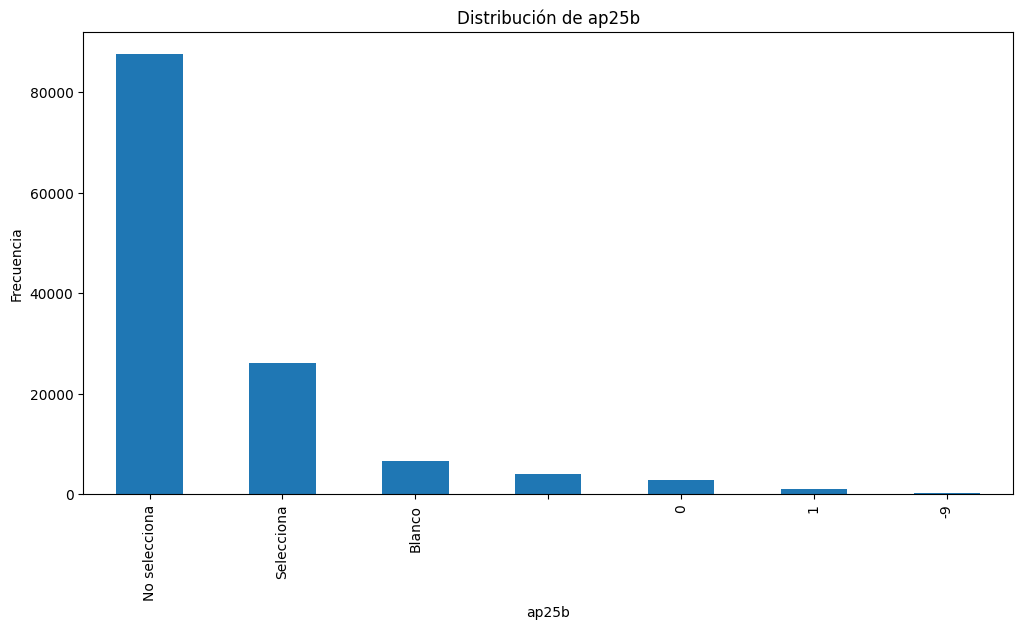

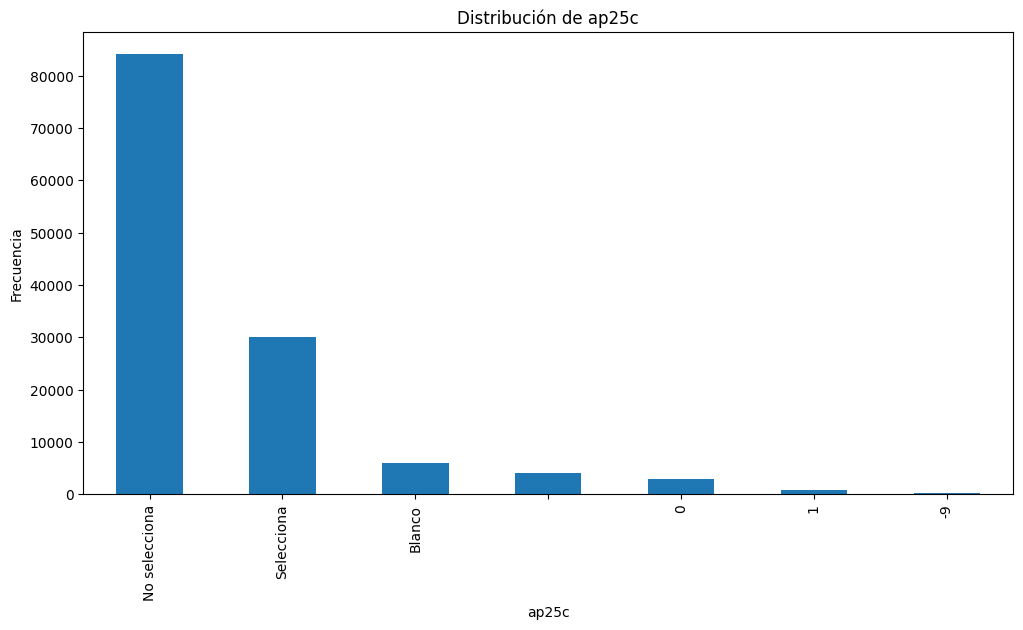

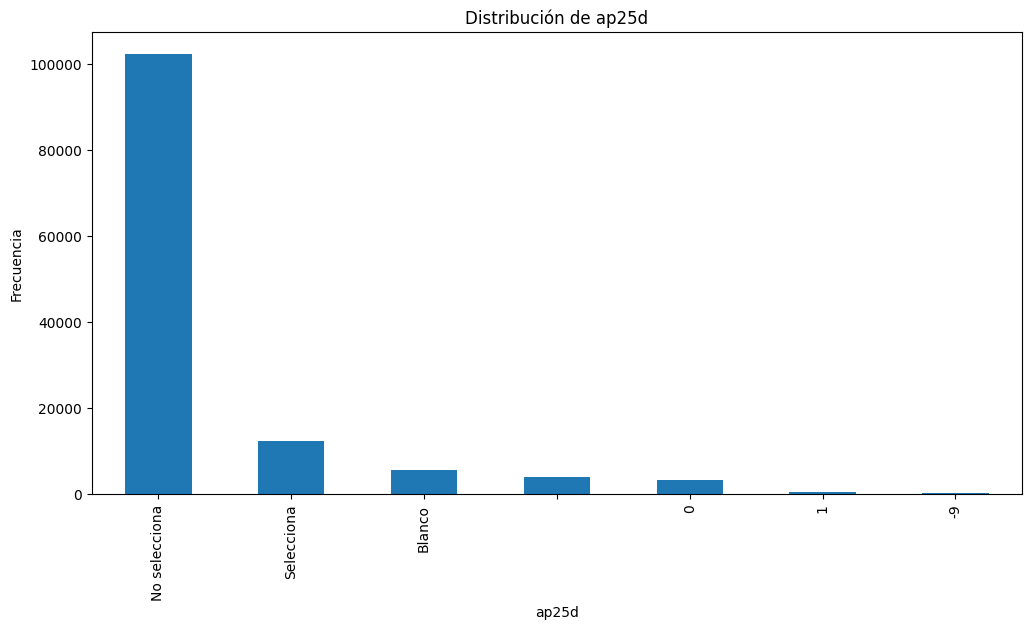

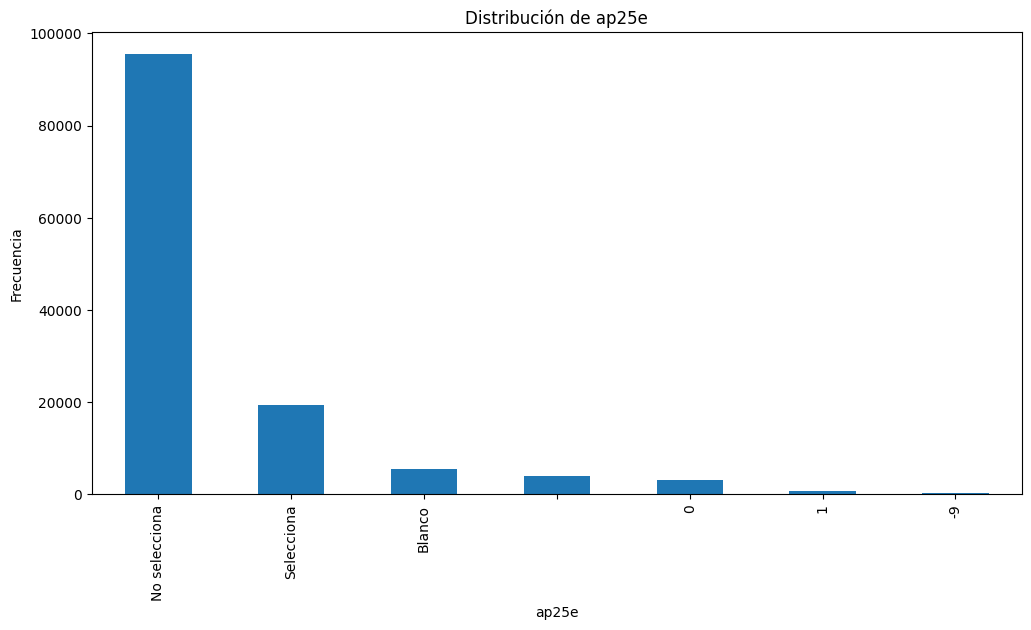

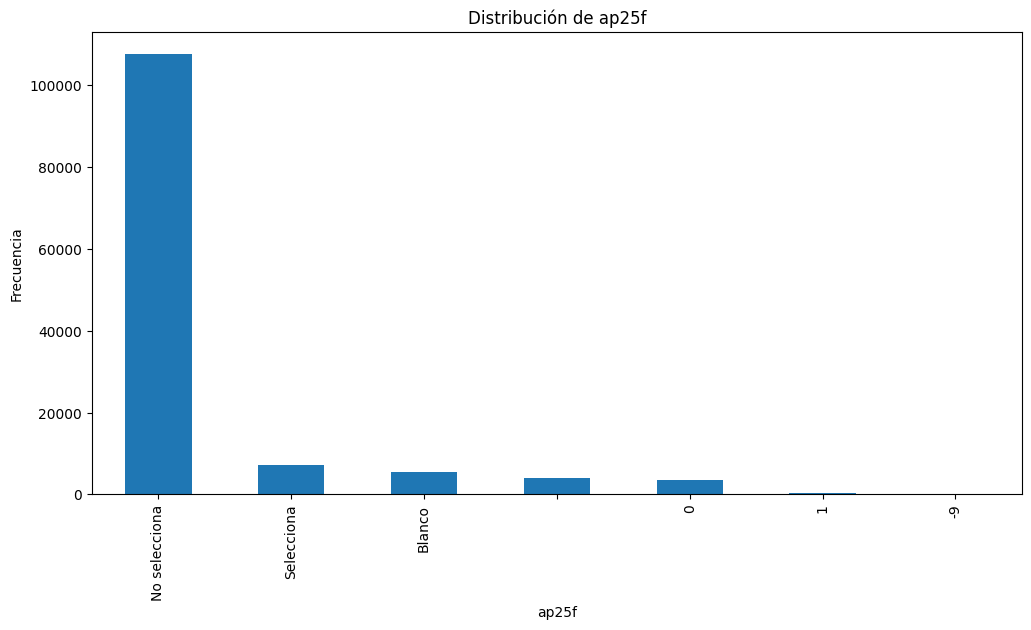

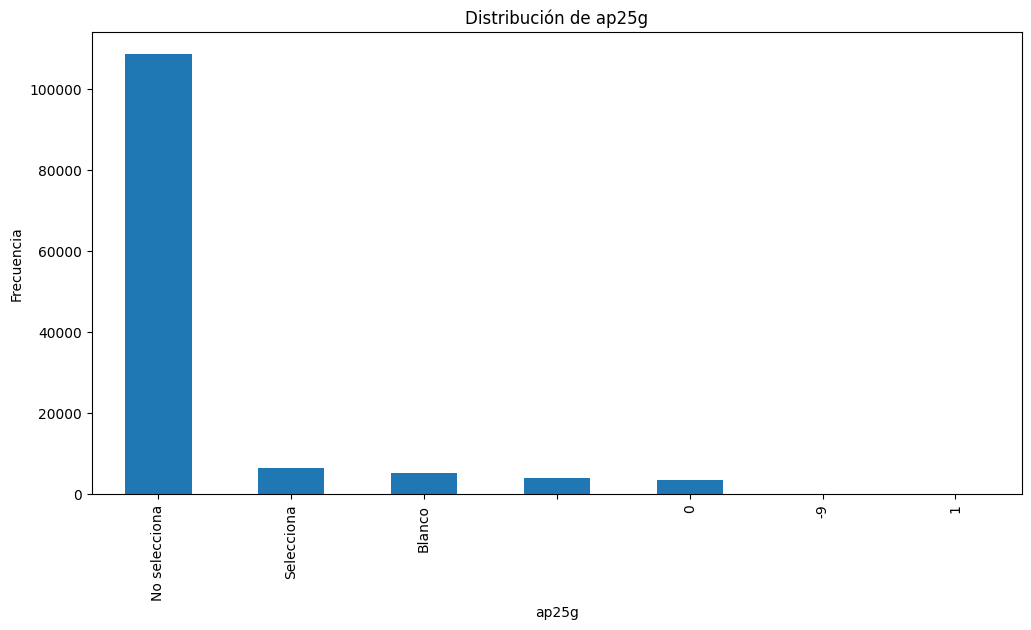

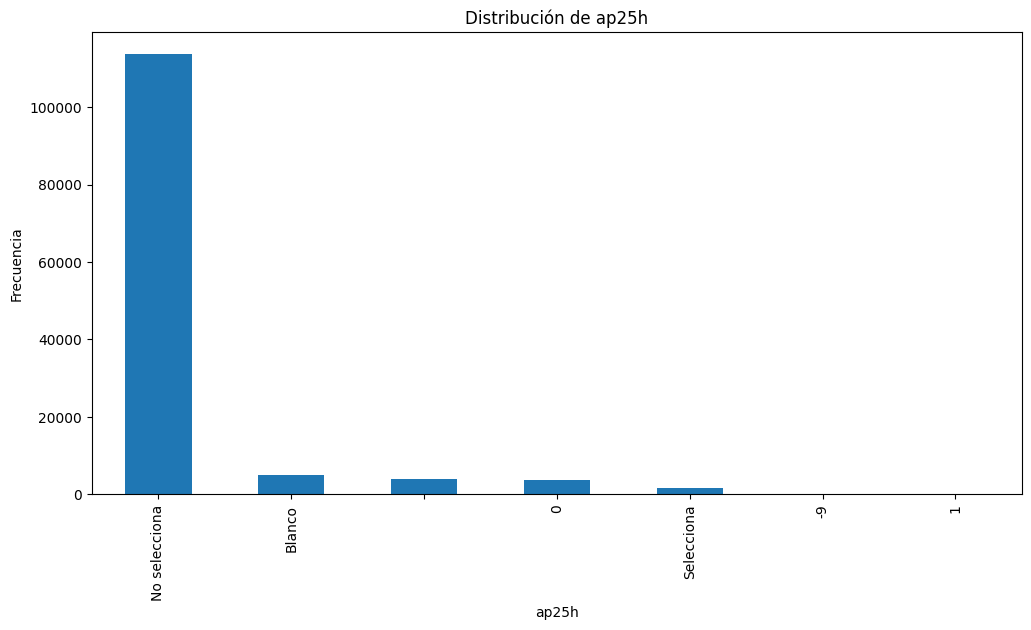

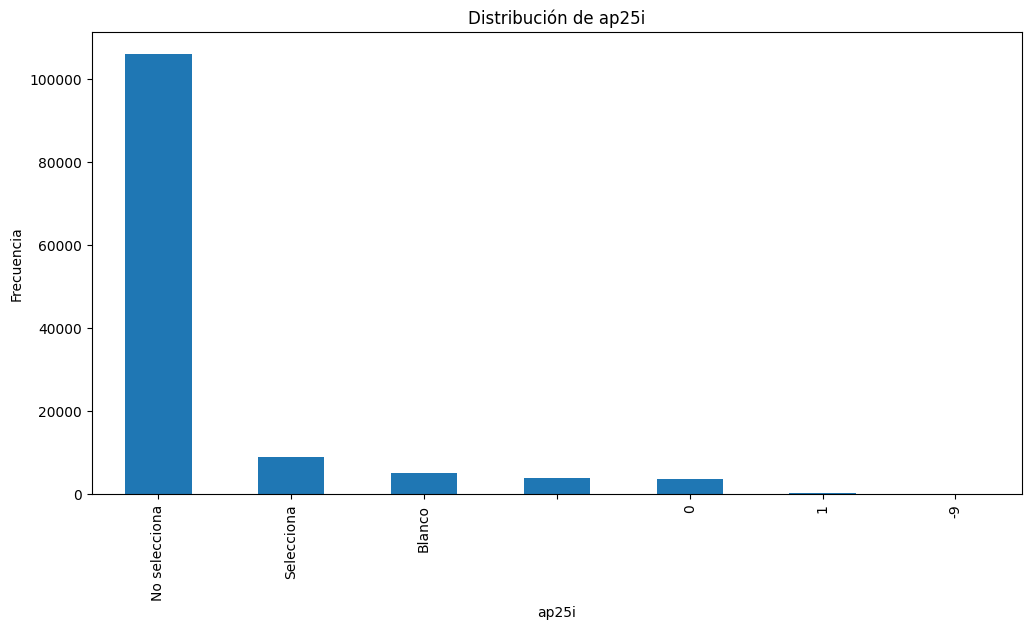

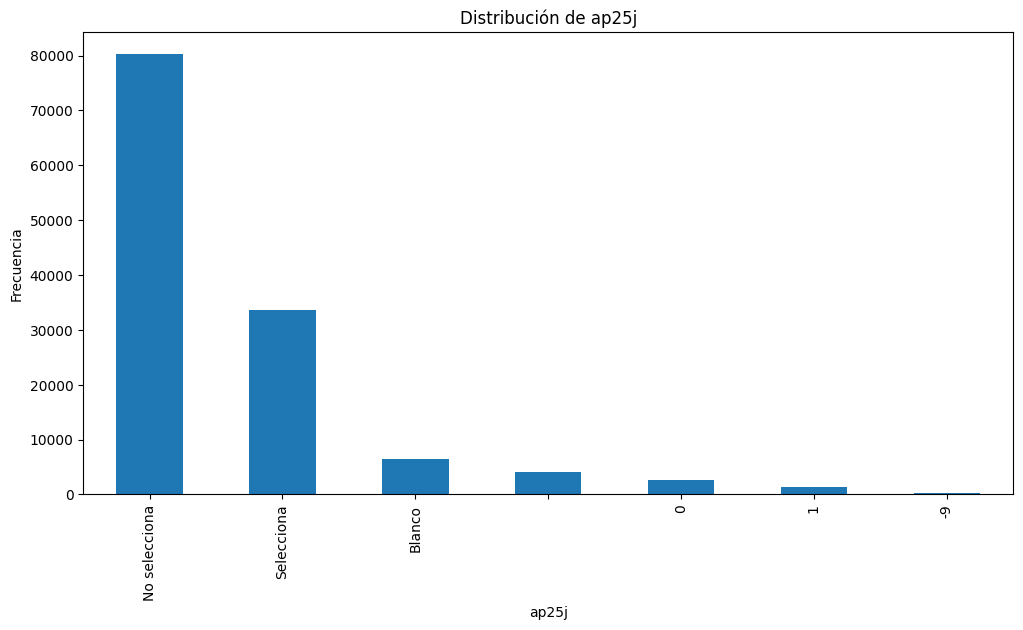

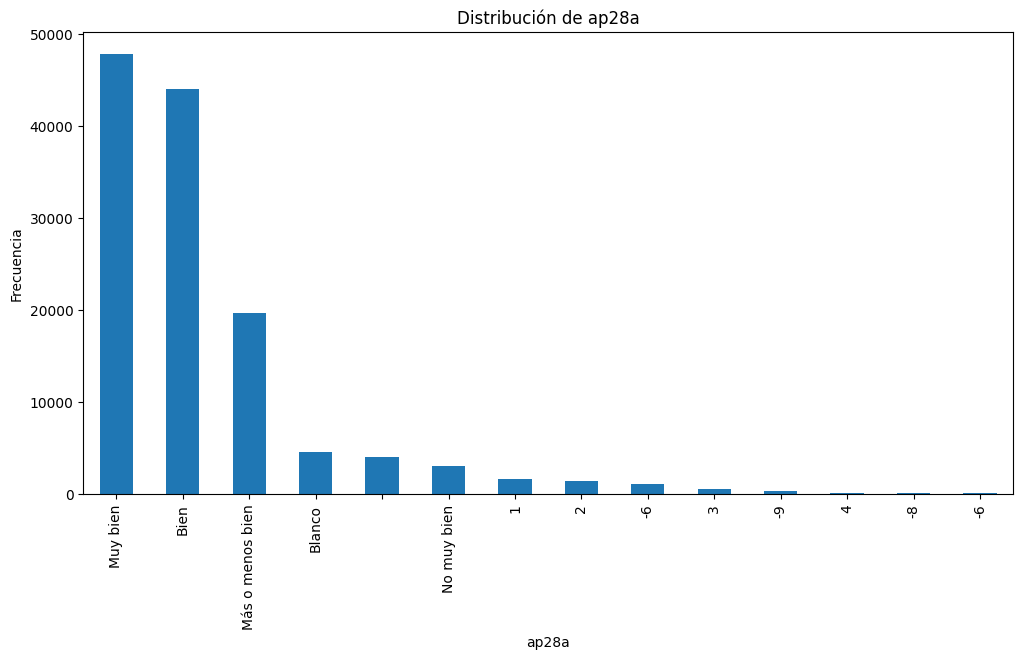

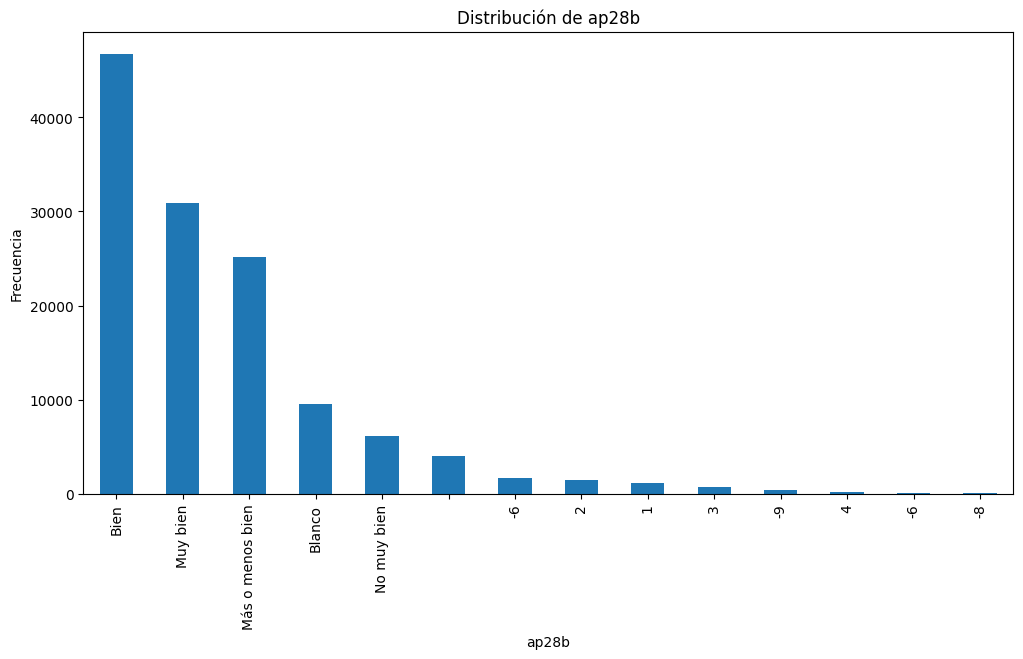

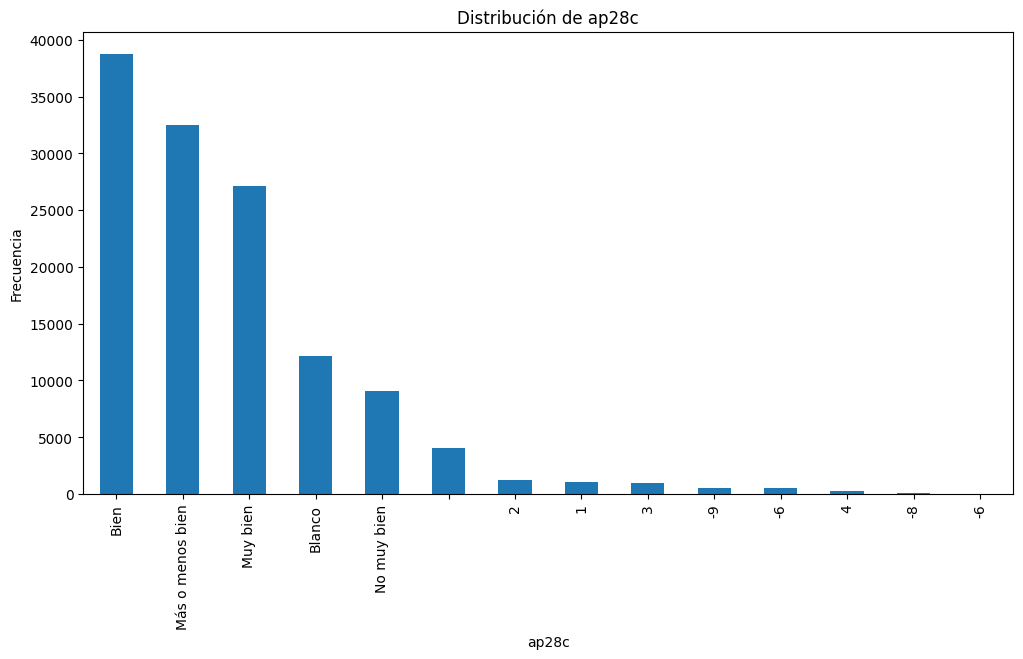

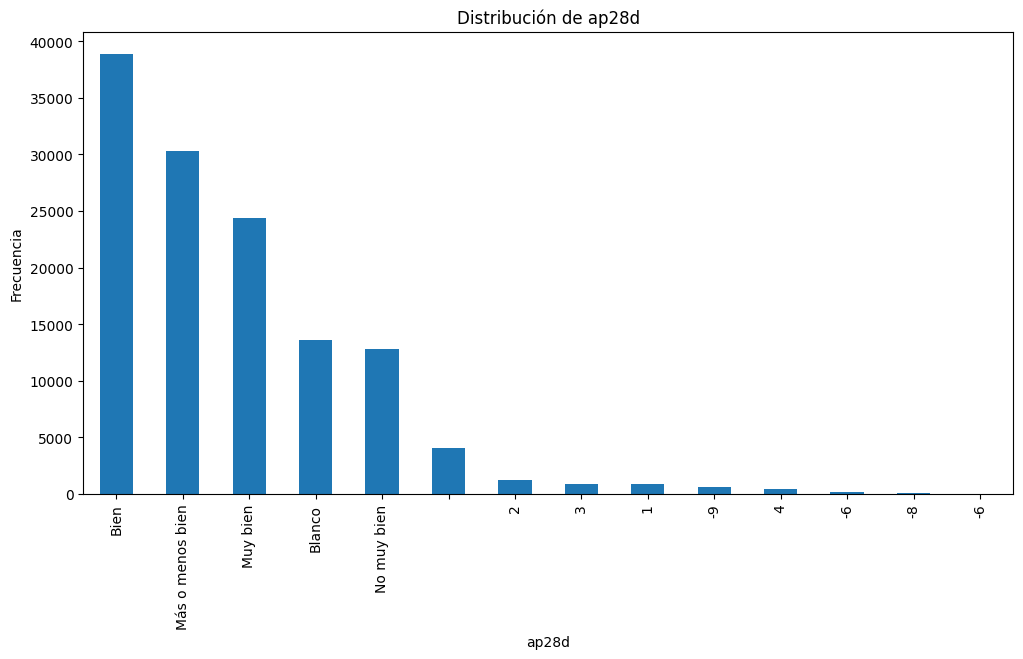

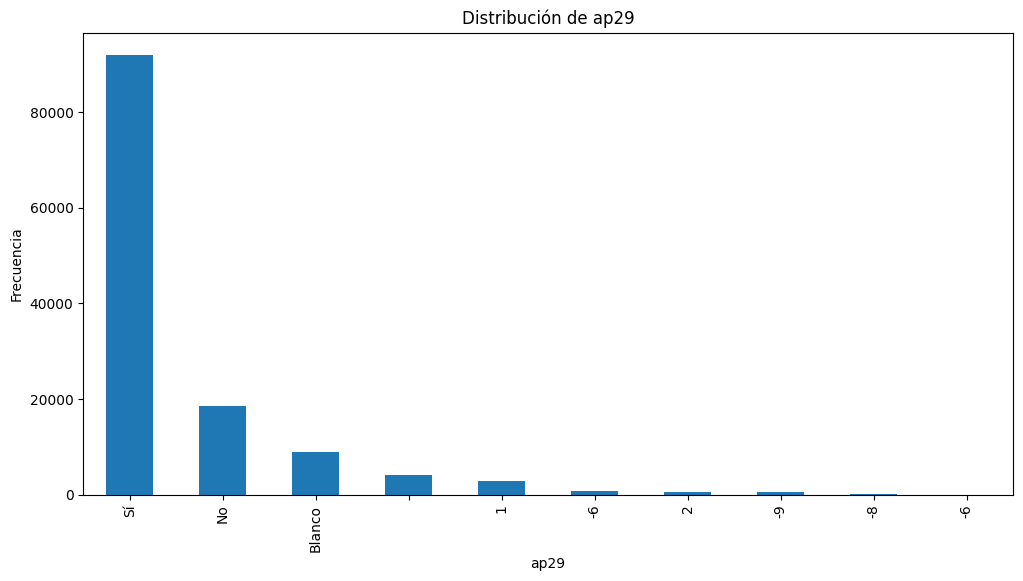

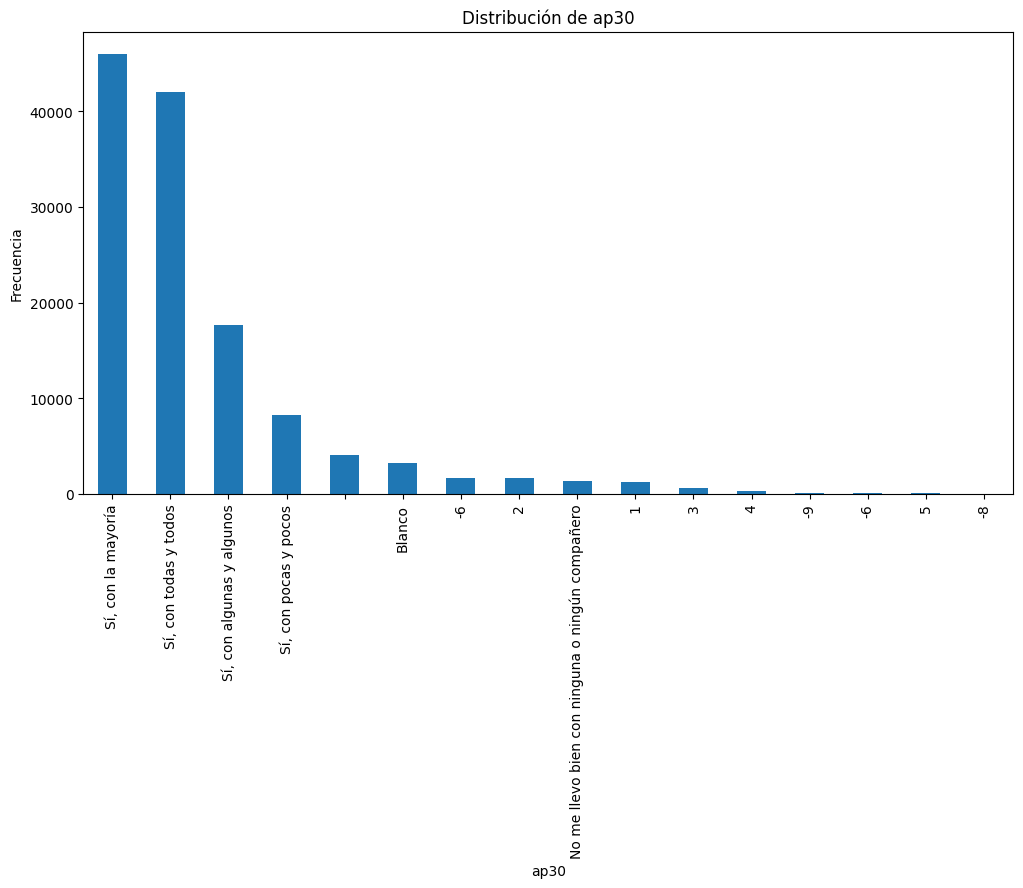

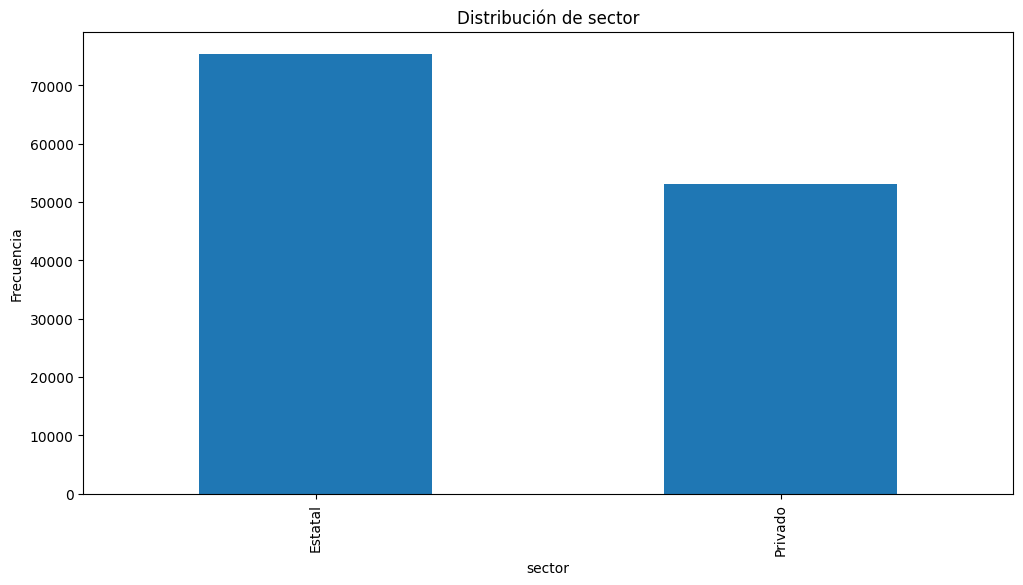

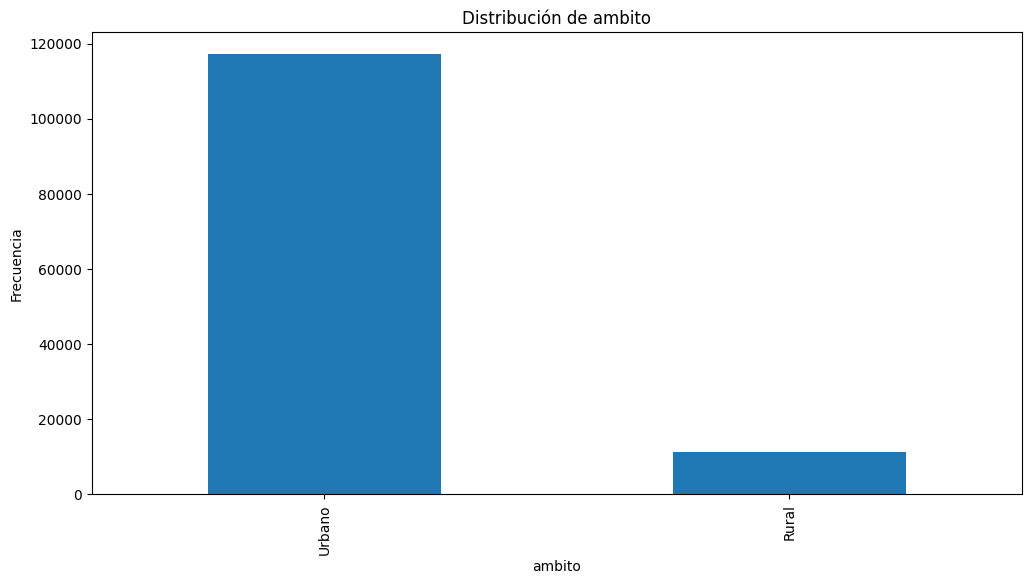

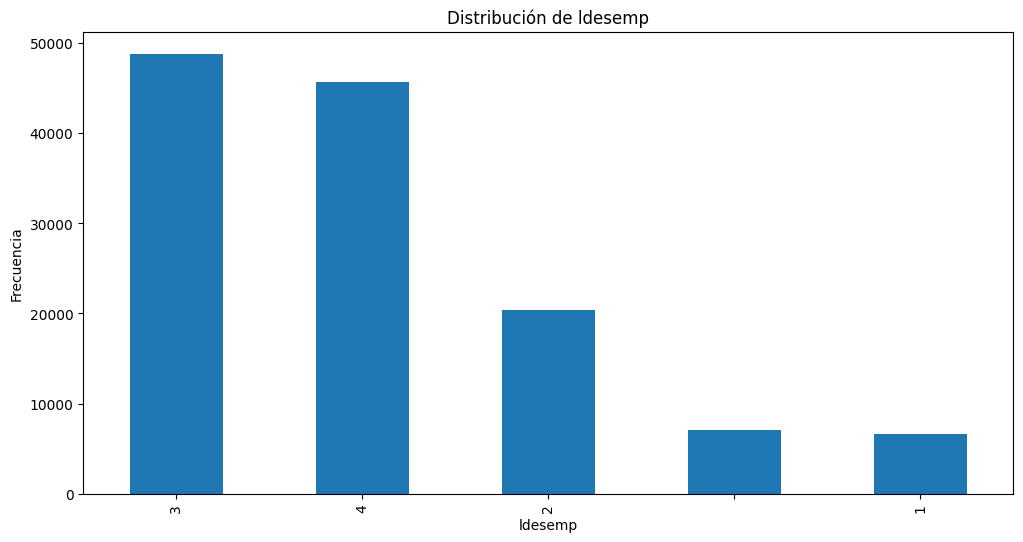

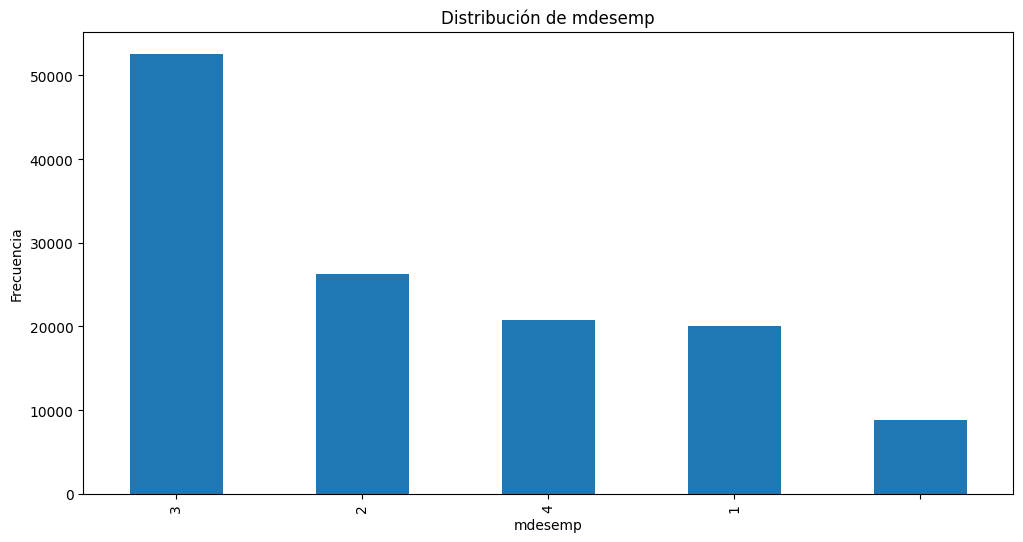

In [ ]:
# Lista de columnas que no te interesan
columnas_a_excluir = ['ID1', 'seccion', 'idalumno','ponder', 'lpondera', 'mpondera']

# Eliminar esas columnas del DataFrame filtrado
df_filtrado = df_filtrado.drop(columns=columnas_a_excluir)

# Seleccionar solo las columnas categóricas
categorical_columns = df_filtrado.select_dtypes(include=['object', 'category', 'int64']).columns

# Crear un gráfico de barras para cada columna categórica
for col in categorical_columns:
    plt.figure(figsize=(12, 6))
    df_filtrado[col].value_counts().plot(kind='bar')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()
